# Predicting Car Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.replace("?", np.nan, inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

In [4]:
cars.loc[2]

symboling                      1
normalized-losses            NaN
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style             hatchback
drive-wheels                 rwd
engine-location            front
wheel-base                  94.5
length                     171.2
width                       65.5
height                      52.4
curb-weight                 2823
engine-type                 ohcv
num-of-cylinders             six
engine-size                  152
fuel-system                 mpfi
bore                        2.68
stroke                      3.47
compression-rate               9
horsepower                   154
peak-rpm                    5000
city-mpg                      19
highway-mpg                   26
price                      16500
Name: 2, dtype: object

In [5]:
to_numeric = ["num-of-doors", "num-of-cylinders", "bore", "stroke", "horsepower","peak-rpm", "price"]
cars[to_numeric].head()

,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
0,two,four,3.47,2.68,111,5000,13495
1,two,four,3.47,2.68,111,5000,16500
2,two,six,2.68,3.47,154,5000,16500
3,four,four,3.19,3.40,102,5500,13950
4,four,five,3.19,3.40,115,5500,17450


In [6]:
mapping = {'four': 4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
cars["num-of-doors"] = cars["num-of-doors"].map(mapping).astype(float)
cars["num-of-cylinders"] = cars["num-of-cylinders"].map(mapping).astype(float)

cars[["bore", "stroke", "horsepower","peak-rpm", "price"]] = cars[["bore", "stroke", "horsepower","peak-rpm", "price"]].astype(float)

In [7]:
cars[to_numeric].head()

,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
0,2.0,4.0,3.47,2.68,111.0,5000.0,13495.0
1,2.0,4.0,3.47,2.68,111.0,5000.0,16500.0
2,2.0,6.0,2.68,3.47,154.0,5000.0,16500.0
3,4.0,4.0,3.19,3.40,102.0,5500.0,13950.0
4,4.0,5.0,3.19,3.40,115.0,5500.0,17450.0


In [8]:
cars.drop("normalized-losses",1, inplace = True)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fuel-type           205 non-null object
aspiration          205 non-null object
num-of-doors        203 non-null float64
body-style          205 non-null object
drive-wheels        205 non-null object
engine-location     205 non-null object
wheel-base          205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curb-weight         205 non-null int64
engine-type         205 non-null object
num-of-cylinders    205 non-null float64
engine-size         205 non-null int64
fuel-system         205 non-null object
bore                201 non-null float64
stroke              201 non-null float64
compression-rate    205 non-null float64
horsepower          203 non-null float64
peak-rpm            203 non-null float64
city-mp

In [10]:
cars.dropna(inplace = True)

In [11]:
numeric_cols =[i for i in list(cars.columns) if i not in ["make", "fuel-type", "aspiration", "body-style", "drive-wheels", "engine-location", "engine-type", "fuel-system"]]
cars = cars[numeric_cols]
cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
cars.iloc[:,:-1] = (cars.iloc[:,:-1] - cars.iloc[:,:-1].min())/(cars.iloc[:,:-1].max() - cars.iloc[:,:-1].min())
cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.333333,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.111111,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.222222,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [13]:
def knn_train_test(training_colname, target_colname, df, k):
    df = df.sample(frac = 1).reset_index(drop = True)
    train = df.iloc[:int(0.8 * len(df))]
    test = df.iloc[int(0.8 * len(df)):]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train[[training_colname]], train[[target_colname]])
    prediction = knn.predict(test[[training_colname]])
    rmse = mean_squared_error(test[[target_colname]], prediction) ** 0.5
    return rmse


In [14]:
univariate_models = pd.Series(name = "rmse")
for i in cars.columns[:-1]:
     univariate_models[i] = knn_train_test([i], "price", cars, 5)
univariate_models.sort_values()

TypeError: unhashable type: 'list'

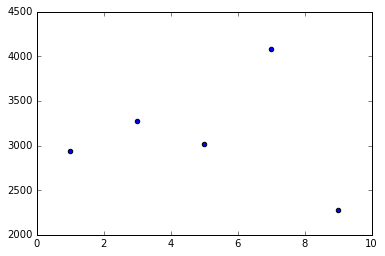

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  

for i in np.arange(1, 10, 2):
    plt.scatter(i, knn_train_test("engine-size", "price", cars, i))

In [16]:
def knn_train_test(training_colname, target_colname, df, k):
    df = df.sample(frac = 1).reset_index(drop = True)
    train = df.iloc[:int(0.8 * len(df))]
    test = df.iloc[int(0.8 * len(df)):]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train[training_colname], train[target_colname])
    prediction = knn.predict(test[training_colname])
    rmse = mean_squared_error(test[target_colname], prediction) ** 0.5
    return rmse
knn_train_test(["engine-size", "horsepower"], "price", cars, 5)

5126.161962086106

In [19]:
cols = "engine-size curb-weight  horsepower width highway-mpg".split()
for i in range(2,6):
    print(i, " - ", knn_train_test(cols[:i], "price", cars, 5))

2  -  3803.8098346869997
3  -  2929.914222075102
4  -  2102.461606344774
5  -  2636.111473655555
